In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import cv2

In [2]:
interpreter = tf.lite.Interpreter(model_path='lite-model_movenet_singlepose_lightning_3.tflite')
interpreter.allocate_tensors()

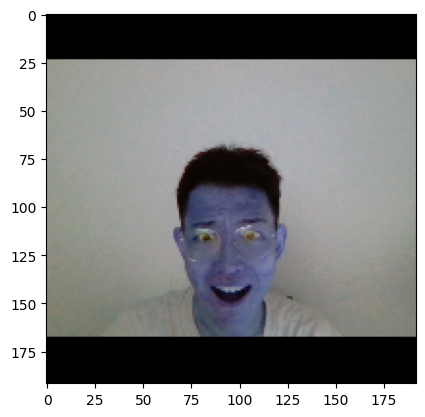

In [6]:
plt.imshow(tf.cast(np.squeeze(img), dtype=tf.int32))

In [7]:
img = frame.copy()

In [8]:
img.shape

(480, 640, 3)

In [9]:
interpreter.get_output_details()

[{'name': 'StatefulPartitionedCall:0',
  'index': 312,
  'shape': array([ 1,  1, 17,  3]),
  'shape_signature': array([ 1,  1, 17,  3]),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [5]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()

    # Reshape image
    img = frame.copy()
    img = tf.image.resize_with_pad(np.expand_dims(img, axis=0), 192,192)
    input_image = tf.cast(img, dtype=tf.float32)
    
    # Setup input and output 
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()
    
    # Make predictions 
    interpreter.set_tensor(input_details[0]['index'], np.array(input_image))
    interpreter.invoke()
    keypoints_with_scores = interpreter.get_tensor(output_details[0]['index'])
    print(keypoints_with_scores)

    cv2.imshow('MoveNet Lightning', frame)

    if cv2.waitKey(10) & 0xFF==ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

[[[[0.6670868  0.55259675 0.48164997]
   [0.6133627  0.6009313  0.7366848 ]
   [0.6135373  0.49461633 0.58737   ]
   [0.64830685 0.64959824 0.5925214 ]
   [0.6509023  0.42285463 0.6021328 ]
   [0.8325219  0.71422076 0.39496326]
   [0.81414914 0.33301553 0.27808195]
   [0.9529842  0.7812993  0.03121468]
   [0.9311311  0.32559147 0.00907627]
   [0.83079904 0.70613205 0.02263033]
   [0.6099415  0.4174541  0.04021233]
   [0.69375366 0.5823469  0.02127296]
   [0.90033484 0.2350044  0.11032   ]
   [0.8361961  0.73894686 0.02670723]
   [0.81465983 0.4703644  0.01159   ]
   [0.69310164 0.63221765 0.01820391]
   [0.94956815 0.20982641 0.01292005]]]]
[[[[0.6679028  0.54931146 0.4886857 ]
   [0.6110685  0.59883904 0.76186424]
   [0.612274   0.49094614 0.6685547 ]
   [0.6461223  0.64940417 0.60147667]
   [0.6476066  0.4239976  0.5882089 ]
   [0.83632565 0.7182662  0.5332048 ]
   [0.804973   0.33564234 0.2677107 ]
   [0.96190655 0.78012514 0.04106882]
   [0.9443562  0.28763786 0.00829259]
   [0.843

In [ ]:
right_eye = keypoints_with_scores[0][0][2]
left_elbow = keypoints_with_scores[0][0][7]